<a href="https://colab.research.google.com/github/Lopes07/TEC-II-Programacao-Avancada/blob/main/Trabalho1/Graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Por favor, selecione o arquivo 'log_interacao.csv' que você exportou.


Saving log_interacao.csv to log_interacao (1).csv

Arquivo 'log_interacao (1).csv' carregado com sucesso!

      RESUMO DA SESSÃO DE INTERAÇÃO
Tempo total de execução: 200.22 segundos
Número total de cliques: 33

Gerando gráfico do percurso do mouse...


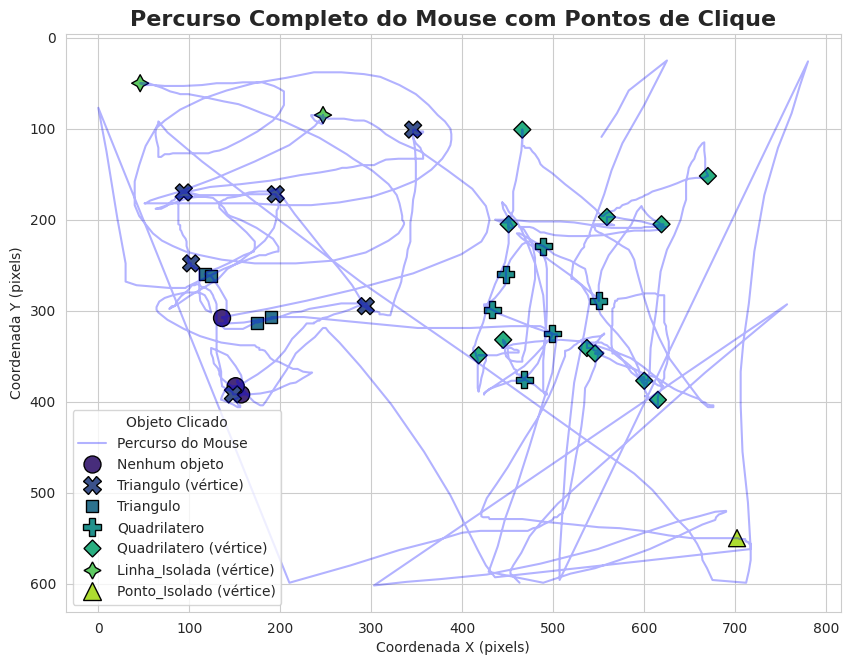


Gerando gráfico de análise de cliques...


/tmp/ipython-input-601691573.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cliques_df, y='objeto_clicado', order=cliques_df['objeto_clicado'].value_counts().index, palette='magma')


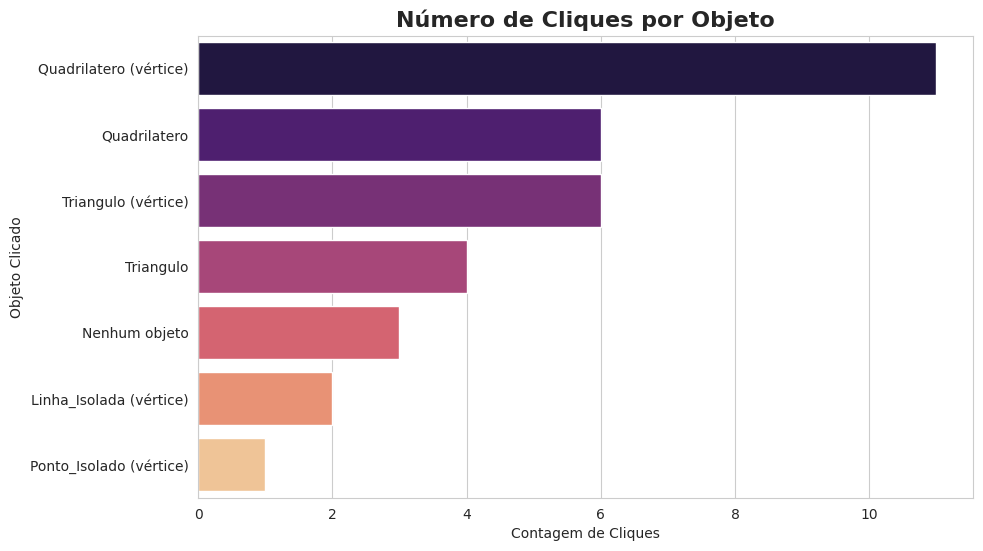

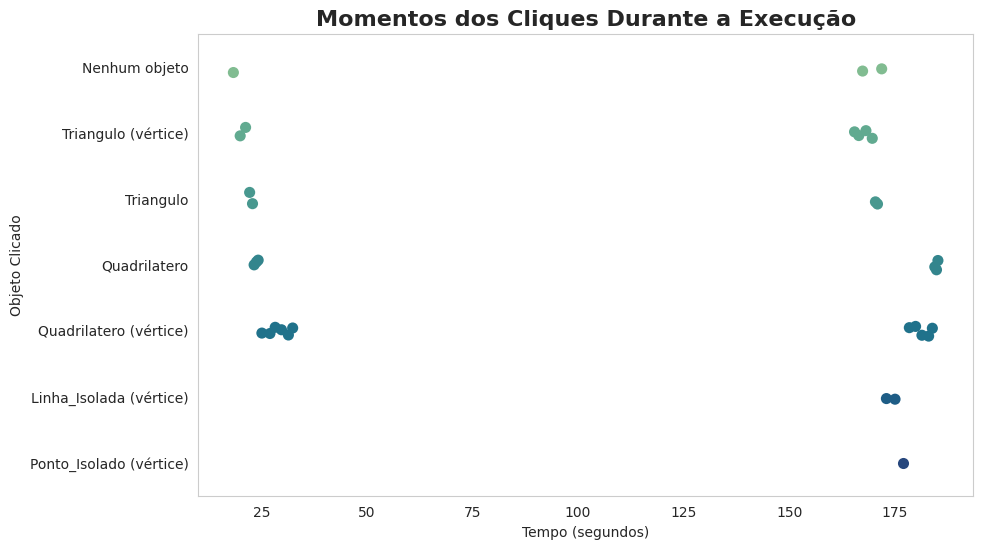

In [1]:
# Bloco de Análise de Dados para o Google Colab

# 1. IMPORTAÇÃO DAS BIBLIOTECAS NECESSÁRIAS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# ==============================================================================
# 2. UPLOAD DO ARQUIVO DE LOG
# ==============================================================================
print("Por favor, selecione o arquivo 'log_interacao.csv' que você exportou.")
# Abre uma janela para você selecionar o arquivo do seu computador.
uploaded = files.upload()

# Pega o nome do arquivo que foi enviado
filename = list(uploaded.keys())[0]
print(f"\nArquivo '{filename}' carregado com sucesso!")

# ==============================================================================
# 3. LEITURA E PROCESSAMENTO DOS DADOS
# ==============================================================================
# Lê o arquivo CSV para um DataFrame do Pandas, a principal ferramenta de análise.
try:
    df = pd.read_csv(filename)

    # Separa os dados de movimento e de cliques para facilitar a análise
    movimentos_df = df[df['evento'] == 'movimento'].copy()
    cliques_df = df[df['evento'] == 'clique'].copy()

    # Extrai as informações de resumo (estão na última linha do log)
    tempo_total = df['tempo_total_execucao'].iloc[-1]
    total_cliques = int(df['total_cliques'].iloc[-1])

    print("\n" + "="*40)
    print("      RESUMO DA SESSÃO DE INTERAÇÃO")
    print("="*40)
    print(f"Tempo total de execução: {tempo_total:.2f} segundos")
    print(f"Número total de cliques: {total_cliques}")
    print("="*40 + "\n")

# ==============================================================================
# 4. GRÁFICO 1: PERCURSO COMPLETO DO MOUSE
# ==============================================================================
    print("Gerando gráfico do percurso do mouse...")

    # Configura o estilo dos gráficos
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 7.5)) # Tamanho da figura (proporcional ao canvas 800x600)

    # Desenha a trajetória do mouse com uma linha azul semitransparente
    plt.plot(movimentos_df['x'], movimentos_df['y'], color='blue', alpha=0.3, label='Percurso do Mouse')

    # Adiciona os pontos de clique sobre a trajetória
    # Cada tipo de objeto clicado terá uma cor e marcador diferente
    sns.scatterplot(
        data=cliques_df,
        x='x',
        y='y',
        hue='objeto_clicado', # Cores diferentes para cada objeto
        style='objeto_clicado', # Formas diferentes para cada objeto
        s=150, # Tamanho dos marcadores
        edgecolor='black',
        palette='viridis',
        legend='full'
    )

    plt.title('Percurso Completo do Mouse com Pontos de Clique', fontsize=16, fontweight='bold')
    plt.xlabel('Coordenada X (pixels)')
    plt.ylabel('Coordenada Y (pixels)')

    # Inverte o eixo Y para corresponder às coordenadas da tela (0,0 no topo)
    plt.gca().invert_yaxis()
    plt.xlim(0, 800) # Limita os eixos ao tamanho do canvas original
    plt.ylim(600, 0)
    plt.legend(title='Objeto Clicado')
    plt.grid(True)
    plt.axis('equal') # Garante que a proporção seja mantida
    plt.show()

# ==============================================================================
# 5. GRÁFICO 2: ANÁLISE DOS CLIQUES
# ==============================================================================
    if not cliques_df.empty:
        print("\nGerando gráfico de análise de cliques...")

        # Gráfico de Barras: Contagem de cliques por objeto
        plt.figure(figsize=(10, 6))
        sns.countplot(data=cliques_df, y='objeto_clicado', order=cliques_df['objeto_clicado'].value_counts().index, palette='magma')
        plt.title('Número de Cliques por Objeto', fontsize=16, fontweight='bold')
        plt.xlabel('Contagem de Cliques')
        plt.ylabel('Objeto Clicado')
        plt.show()

        # Gráfico de Linha: Cliques ao longo do tempo
        plt.figure(figsize=(10, 6))
        # O jitter adiciona uma pequena variação vertical para que pontos no mesmo tempo não se sobreponham
        sns.stripplot(data=cliques_df, x='timestamp', y='objeto_clicado', jitter=0.1, size=8, palette='crest', hue='objeto_clicado', legend=False)
        plt.title('Momentos dos Cliques Durante a Execução', fontsize=16, fontweight='bold')
        plt.xlabel('Tempo (segundos)')
        plt.ylabel('Objeto Clicado')
        plt.grid(axis='x')
        plt.show()
    else:
        print("\nNenhum clique foi registrado para gerar a análise de cliques.")

except Exception as e:
    print(f"\nOcorreu um erro ao processar o arquivo: {e}")
    print("Verifique se o arquivo 'log_interacao.csv' foi selecionado e não está corrompido.")